In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#carga desde un archivo .csv sin indice 
data = pd.read_csv('listing_pais_sin_nulos.csv')
data.head(5)

,Unnamed: 0,id,listing_url,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,97945.0,https://www.airbnb.com/rooms/97945,517685,18/04/2011,a few days or more,0%,6%,f,2,...,4.90,4.93,4.78,4.73,f,2,2,0,0,0.80
1,1,114695.0,https://www.airbnb.com/rooms/114695,581737,12/05/2011,within an hour,100%,99%,t,3,...,4.97,5.00,4.66,4.61,f,3,3,0,0,0.46
2,2,127383.0,https://www.airbnb.com/rooms/127383,630556,26/05/2011,within an hour,100%,92%,f,2,...,4.98,4.96,4.91,4.81,f,1,1,0,0,0.71
3,3,159634.0,https://www.airbnb.com/rooms/159634,765694,01/07/2011,within an hour,100%,78%,f,1,...,4.78,4.80,4.59,4.44,t,1,1,0,0,0.26
4,4,170154.0,https://www.airbnb.com/rooms/170154,108297,14/04/2010,within a few hours,100%,100%,t,1,...,4.99,4.98,4.77,4.91,f,1,0,1,0,3.58


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8021 entries, 0 to 8020
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    8021 non-null   int64  
 1   id                                            8021 non-null   float64
 2   listing_url                                   8021 non-null   object 
 3   host_id                                       8021 non-null   int64  
 4   host_since                                    8021 non-null   object 
 5   host_response_time                            8021 non-null   object 
 6   host_response_rate                            8021 non-null   object 
 7   host_acceptance_rate                          8021 non-null   object 
 8   host_is_superhost                             8021 non-null   object 
 9   host_listings_count                           8021 non-null   i

In [4]:
data = data.drop(['Unnamed: 0'], axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8021 entries, 0 to 8020
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8021 non-null   float64
 1   listing_url                                   8021 non-null   object 
 2   host_id                                       8021 non-null   int64  
 3   host_since                                    8021 non-null   object 
 4   host_response_time                            8021 non-null   object 
 5   host_response_rate                            8021 non-null   object 
 6   host_acceptance_rate                          8021 non-null   object 
 7   host_is_superhost                             8021 non-null   object 
 8   host_listings_count                           8021 non-null   int64  
 9   host_total_listings_count                     8021 non-null   i

In [6]:
#Corroborar valores Nulos
#Identificar cuantos valores nulos tengo por columna 
valores_nulos = data.isnull().sum()
valores_nulos

id                                              0
listing_url                                     0
host_id                                         0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bathrooms_text                                  0
bedrooms                                        0


In [7]:
# Separar columnas cuantitativas y cualitativas
cuantitativas = data.iloc[ : , [8,9,12,13,16,17,19,20,23,24,25,26,28,29,30,31,32,33,34,37,38,39,40,41,42,43,45,46,47,48,49]]
cualitativas = data.iloc[ : , [0,1,3,4,5,6,7,10,11,14,15,18,21,22,27,35,36,44]]

In [8]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8021 entries, 0 to 8020
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_listings_count                           8021 non-null   int64  
 1   host_total_listings_count                     8021 non-null   int64  
 2   latitude                                      8021 non-null   float64
 3   longitude                                     8021 non-null   float64
 4   accommodates                                  8021 non-null   int64  
 5   bathrooms                                     8021 non-null   float64
 6   bedrooms                                      8021 non-null   float64
 7   beds                                          8021 non-null   float64
 8   minimum_nights                                8021 non-null   int64  
 9   maximum_nights                                8021 non-null   i

In [9]:
cualitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8021 entries, 0 to 8020
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8021 non-null   float64
 1   listing_url             8021 non-null   object 
 2   host_since              8021 non-null   object 
 3   host_response_time      8021 non-null   object 
 4   host_response_rate      8021 non-null   object 
 5   host_acceptance_rate    8021 non-null   object 
 6   host_is_superhost       8021 non-null   object 
 7   host_verifications      8021 non-null   object 
 8   neighbourhood_cleansed  8021 non-null   object 
 9   property_type           8021 non-null   object 
 10  room_type               8021 non-null   object 
 11  bathrooms_text          8021 non-null   object 
 12  amenities               8021 non-null   object 
 13  price                   8021 non-null   object 
 14  has_availability        8021 non-null   

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x800 with 0 Axes>

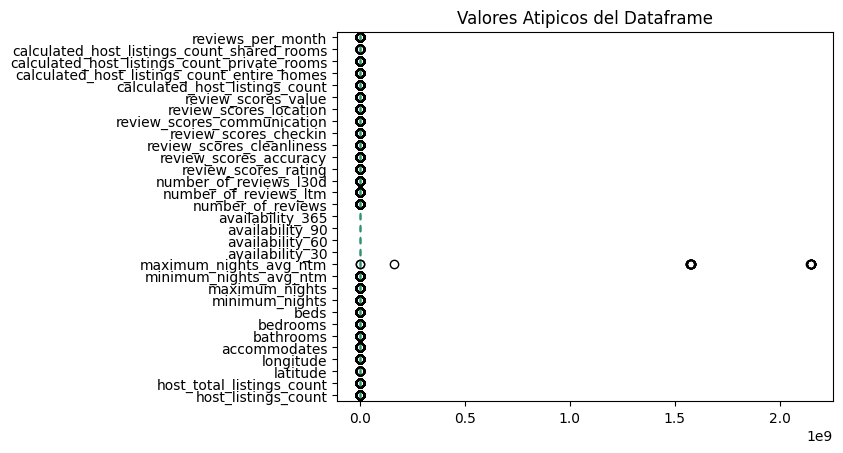

In [10]:
fig = plt.figure (figsize = (15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

In [11]:
#Métodos aplicando desviacion estandar, Encuentro los valores extremos
y = cuantitativas
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior =  y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_listings_count                             1.211260e+02
host_total_listings_count                       1.430213e+02
latitude                                        4.821708e+01
longitude                                       1.171027e+01
accommodates                                    7.806552e+00
bathrooms                                       2.205263e+00
bedrooms                                        4.601236e+00
beds                                            5.300539e+00
minimum_nights                                  9.509804e+01
maximum_nights                                  1.482264e+03
minimum_nights_avg_ntm                          9.472149e+01
maximum_nights_avg_ntm                          2.770593e+08
availability_30                                 3.872406e+01
availability_60                                 8.703169e+01
availability_90                                 1.377170e+02
availability_365                                5.107728e+0

In [12]:
#Obtenemos datos y los outliers se convierten en nulos
data2 = cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data2

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.0,3.0,48.114920,11.489540,2.0,1.0,1.0,1.0,2.0,90,...,4.81,4.90,4.93,4.78,4.73,2.0,2.0,0.0,0.0,0.80
1,3.0,3.0,48.120710,11.637580,6.0,1.0,1.0,1.0,2.0,30,...,4.95,4.97,5.00,4.66,4.61,3.0,3.0,0.0,0.0,0.46
2,2.0,2.0,48.151990,11.564820,4.0,1.1,1.0,1.6,3.0,20,...,4.81,4.98,4.96,4.91,4.81,1.0,1.0,0.0,0.0,0.71
3,1.0,1.0,48.138550,11.465860,2.0,1.0,1.0,1.0,3.0,35,...,4.27,4.78,4.80,4.59,4.44,1.0,1.0,0.0,0.0,0.26
4,1.0,1.0,48.108140,11.527330,4.0,1.0,1.0,2.0,3.0,1125,...,4.99,4.99,4.98,4.77,4.91,1.0,0.0,1.0,0.0,3.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8016,1.0,5.0,48.153267,11.563311,2.0,1.0,1.0,1.0,3.0,8,...,5.00,4.80,5.00,4.90,5.00,1.0,1.0,0.0,0.0,1.00
8017,1.0,1.0,48.089654,11.612936,4.0,2.0,2.0,4.0,1.0,4,...,5.00,4.80,5.00,4.90,5.00,1.0,0.0,1.0,0.0,1.00
8018,1.0,1.0,48.184802,11.550921,2.0,1.0,1.0,1.0,2.0,8,...,5.00,4.80,5.00,4.90,5.00,1.0,1.0,0.0,0.0,1.00
8019,1.0,1.0,48.139270,11.542720,2.0,1.0,1.0,1.0,1.0,3,...,5.00,4.80,5.00,4.90,5.00,1.0,0.0,1.0,0.0,1.00


In [13]:
#Identificar valores atipicos
valores_nulos = data2.isnull().sum()
valores_nulos

host_listings_count                              20
host_total_listings_count                        20
latitude                                         20
longitude                                       111
accommodates                                    167
bathrooms                                       147
bedrooms                                         40
beds                                            113
minimum_nights                                  115
maximum_nights                                    0
minimum_nights_avg_ntm                          122
maximum_nights_avg_ntm                           19
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability_365                                  0
number_of_reviews                               144
number_of_reviews_ltm                            79
number_of_reviews_l30d                           79
review_score

In [14]:
data_clean = data2.copy()
data_clean = data_clean.fillna(round(data2.mean(),1))
data_clean

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.0,3.0,48.114920,11.489540,2.0,1.0,1.0,1.0,2.0,90,...,4.81,4.90,4.93,4.78,4.73,2.0,2.0,0.0,0.0,0.80
1,3.0,3.0,48.120710,11.637580,6.0,1.0,1.0,1.0,2.0,30,...,4.95,4.97,5.00,4.66,4.61,3.0,3.0,0.0,0.0,0.46
2,2.0,2.0,48.151990,11.564820,4.0,1.1,1.0,1.6,3.0,20,...,4.81,4.98,4.96,4.91,4.81,1.0,1.0,0.0,0.0,0.71
3,1.0,1.0,48.138550,11.465860,2.0,1.0,1.0,1.0,3.0,35,...,4.27,4.78,4.80,4.59,4.44,1.0,1.0,0.0,0.0,0.26
4,1.0,1.0,48.108140,11.527330,4.0,1.0,1.0,2.0,3.0,1125,...,4.99,4.99,4.98,4.77,4.91,1.0,0.0,1.0,0.0,3.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8016,1.0,5.0,48.153267,11.563311,2.0,1.0,1.0,1.0,3.0,8,...,5.00,4.80,5.00,4.90,5.00,1.0,1.0,0.0,0.0,1.00
8017,1.0,1.0,48.089654,11.612936,4.0,2.0,2.0,4.0,1.0,4,...,5.00,4.80,5.00,4.90,5.00,1.0,0.0,1.0,0.0,1.00
8018,1.0,1.0,48.184802,11.550921,2.0,1.0,1.0,1.0,2.0,8,...,5.00,4.80,5.00,4.90,5.00,1.0,1.0,0.0,0.0,1.00
8019,1.0,1.0,48.139270,11.542720,2.0,1.0,1.0,1.0,1.0,3,...,5.00,4.80,5.00,4.90,5.00,1.0,0.0,1.0,0.0,1.00


In [15]:
#Identificar valores atipicos
valores_nulos = data_clean.isnull().sum()
valores_nulos

host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_rating                            0


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x800 with 0 Axes>

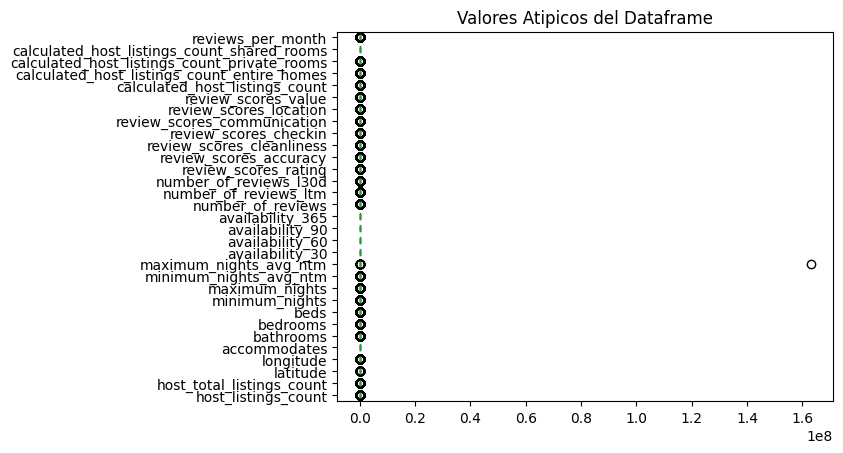

In [16]:
fig = plt.figure (figsize = (15, 8))
data_clean.plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show

**PROCESAMIENTO ""DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [17]:
y = cuantitativas
percentiles25 = y.quantile(0.25) # Q1
percentiles75 = y.quantile(0.75) # Q3
iqr = percentiles75 - percentiles25

Limite_Superior_iqr = percentiles75 + 1.5*iqr
Limite_Inferior_iqr = percentiles25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_listings_count                                3.500000
host_total_listings_count                          6.000000
latitude                                          48.206157
longitude                                         11.657405
accommodates                                       7.000000
bathrooms                                          1.250000
bedrooms                                           1.000000
beds                                               3.500000
minimum_nights                                     6.000000
maximum_nights                                   875.000000
minimum_nights_avg_ntm                             6.750000
maximum_nights_avg_ntm                          1780.000000
availability_30                                   45.000000
availability_60                                  110.000000
availability_90                                  180.000000
availability_365                                 609.500000
number_of_revi

In [18]:
#Obtenemos datos limpios del Dataframe
data2_iqr = cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2_iqr

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.0,3.0,48.114920,11.489540,2.0,1.0,1.0,1.0,2.0,90.0,...,4.81,4.90,4.93,4.78,4.73,2.0,2.0,0.0,0.0,0.80
1,3.0,3.0,48.120710,11.637580,6.0,1.0,1.0,1.0,2.0,30.0,...,4.95,4.97,5.00,4.66,4.61,3.0,NaN,0.0,0.0,0.46
2,2.0,2.0,48.151990,11.564820,4.0,1.1,1.0,1.6,3.0,20.0,...,4.81,4.98,4.96,4.91,4.81,1.0,1.0,0.0,0.0,0.71
3,1.0,1.0,48.138550,NaN,2.0,1.0,1.0,1.0,3.0,35.0,...,4.27,4.78,4.80,4.59,4.44,1.0,1.0,0.0,0.0,0.26
4,1.0,1.0,48.108140,11.527330,4.0,1.0,1.0,2.0,3.0,NaN,...,4.99,4.99,4.98,4.77,4.91,1.0,0.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8016,1.0,5.0,48.153267,11.563311,2.0,1.0,1.0,1.0,3.0,8.0,...,5.00,4.80,5.00,4.90,5.00,1.0,1.0,0.0,0.0,1.00
8017,1.0,1.0,48.089654,11.612936,4.0,NaN,NaN,NaN,1.0,4.0,...,5.00,4.80,5.00,4.90,5.00,1.0,0.0,1.0,0.0,1.00
8018,1.0,1.0,48.184802,11.550921,2.0,1.0,1.0,1.0,2.0,8.0,...,5.00,4.80,5.00,4.90,5.00,1.0,1.0,0.0,0.0,1.00
8019,1.0,1.0,48.139270,11.542720,2.0,1.0,1.0,1.0,1.0,3.0,...,5.00,4.80,5.00,4.90,5.00,1.0,0.0,1.0,0.0,1.00


In [19]:
#Identificar valores nulos del dataframe LIMPIO
valores_nulos = data2_iqr.isnull().sum()
valores_nulos

host_listings_count                             1312
host_total_listings_count                       1021
latitude                                          85
longitude                                        637
accommodates                                     167
bathrooms                                       1138
bedrooms                                        1736
beds                                             376
minimum_nights                                  1080
maximum_nights                                  1288
minimum_nights_avg_ntm                          1118
maximum_nights_avg_ntm                            22
availability_30                                    0
availability_60                                    0
availability_90                                    0
availability_365                                   0
number_of_reviews                                983
number_of_reviews_ltm                            892
number_of_reviews_l30d                        

In [20]:
#Reemplazamos valores atipicops (nulos) del dataframe con "mean"

data3_iqr = data2_iqr.copy()
data3_iqr = data3_iqr.fillna(round(data2.mean(),1))
data3_iqr

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.0,3.0,48.114920,11.489540,2.0,1.0,1.0,1.0,2.0,90.0,...,4.81,4.90,4.93,4.78,4.73,2.0,2.0,0.0,0.0,0.80
1,3.0,3.0,48.120710,11.637580,6.0,1.0,1.0,1.0,2.0,30.0,...,4.95,4.97,5.00,4.66,4.61,3.0,1.3,0.0,0.0,0.46
2,2.0,2.0,48.151990,11.564820,4.0,1.1,1.0,1.6,3.0,20.0,...,4.81,4.98,4.96,4.91,4.81,1.0,1.0,0.0,0.0,0.71
3,1.0,1.0,48.138550,11.600000,2.0,1.0,1.0,1.0,3.0,35.0,...,4.27,4.78,4.80,4.59,4.44,1.0,1.0,0.0,0.0,0.26
4,1.0,1.0,48.108140,11.527330,4.0,1.0,1.0,2.0,3.0,334.1,...,4.99,4.99,4.98,4.77,4.91,1.0,0.0,1.0,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8016,1.0,5.0,48.153267,11.563311,2.0,1.0,1.0,1.0,3.0,8.0,...,5.00,4.80,5.00,4.90,5.00,1.0,1.0,0.0,0.0,1.00
8017,1.0,1.0,48.089654,11.612936,4.0,1.1,1.2,1.5,1.0,4.0,...,5.00,4.80,5.00,4.90,5.00,1.0,0.0,1.0,0.0,1.00
8018,1.0,1.0,48.184802,11.550921,2.0,1.0,1.0,1.0,2.0,8.0,...,5.00,4.80,5.00,4.90,5.00,1.0,1.0,0.0,0.0,1.00
8019,1.0,1.0,48.139270,11.542720,2.0,1.0,1.0,1.0,1.0,3.0,...,5.00,4.80,5.00,4.90,5.00,1.0,0.0,1.0,0.0,1.00


In [21]:
#Identificar valores nulos del dataframe LIMPIO
valores_nulos = data3_iqr.isnull().sum()
valores_nulos

host_listings_count                             0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_rating                            0


In [22]:
Datos_limpios = pd.concat([cualitativas, data3_iqr ] , axis=1)
Datos_limpios

,id,listing_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,neighbourhood_cleansed,property_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9.794500e+04,https://www.airbnb.com/rooms/97945,18/04/2011,a few days or more,0%,6%,f,"['email', 'phone']",Hadern,Entire rental unit,...,4.81,4.90,4.93,4.78,4.73,2.0,2.0,0.0,0.0,0.80
1,1.146950e+05,https://www.airbnb.com/rooms/114695,12/05/2011,within an hour,100%,99%,t,"['email', 'phone']",Berg am Laim,Entire rental unit,...,4.95,4.97,5.00,4.66,4.61,3.0,1.3,0.0,0.0,0.46
2,1.273830e+05,https://www.airbnb.com/rooms/127383,26/05/2011,within an hour,100%,92%,f,"['email', 'phone', 'work_email']",Maxvorstadt,Entire rental unit,...,4.81,4.98,4.96,4.91,4.81,1.0,1.0,0.0,0.0,0.71
3,1.596340e+05,https://www.airbnb.com/rooms/159634,01/07/2011,within an hour,100%,78%,f,"['email', 'phone']",Pasing-Obermenzing,Entire rental unit,...,4.27,4.78,4.80,4.59,4.44,1.0,1.0,0.0,0.0,0.26
4,1.701540e+05,https://www.airbnb.com/rooms/170154,14/04/2010,within a few hours,100%,100%,t,"['email', 'phone']",Sendling-Westpark,Private room in home,...,4.99,4.99,4.98,4.77,4.91,1.0,0.0,1.0,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8016,1.252200e+18,https://www.airbnb.com/rooms/1252204445878776998,05/07/2013,Estado de manera desconocida,100%,100%,f,"['email', 'phone']",Maxvorstadt,Entire rental unit,...,5.00,4.80,5.00,4.90,5.00,1.0,1.0,0.0,0.0,1.00
8017,1.252220e+18,https://www.airbnb.com/rooms/1252221965097369365,23/09/2024,Estado de manera desconocida,100%,100%,f,['phone'],Obergiesing,Private room in bed and breakfast,...,5.00,4.80,5.00,4.90,5.00,1.0,0.0,1.0,0.0,1.00
8018,1.252240e+18,https://www.airbnb.com/rooms/1252243902096578406,23/09/2024,Estado de manera desconocida,100%,100%,f,"['email', 'phone']",Milbertshofen-Am Hart,Entire rental unit,...,5.00,4.80,5.00,4.90,5.00,1.0,1.0,0.0,0.0,1.00
8019,1.252300e+18,https://www.airbnb.com/rooms/1252302783564354993,24/01/2018,Estado de manera desconocida,100%,100%,f,"['email', 'phone']",Schwanthalerhöhe,Private room in rental unit,...,5.00,4.80,5.00,4.90,5.00,1.0,0.0,1.0,0.0,1.00


In [23]:
#Convertir DataFrame a CSV
Datos_limpios.to_csv("Datos_Limpios_pais.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1500x800 with 0 Axes>

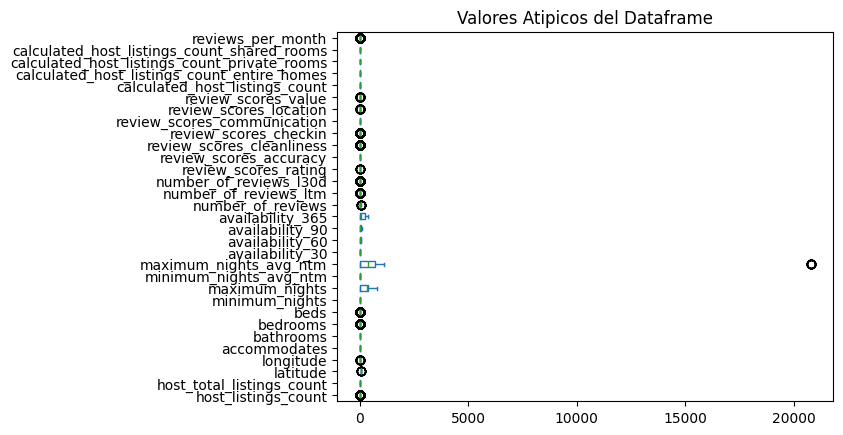

In [24]:
fig = plt.figure (figsize = (15, 8))
data3_iqr.plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show